In [3]:
import pandas as pd
import sys
import os
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

query_df = pd.read_csv("../data/textsentiment.csv")

query_df

,user_id,contact_id,relationship,channel,sent_at,message,positive,negative,neutral,compound,word_count
0,10,35,Ex,text_message,2013-01-28 07:31:44,hey Aldo! I was just thinking about you the ot...,0.000,0.558,0.442,-0.5848,36
1,10,35,Ex,text_message,2013-01-28 07:31:44,it would be great to catch up sometime soon!,0.274,0.070,0.655,0.7604,9
2,10,35,Ex,text_message,2013-01-28 11:42:34,that would be great! my plans are a bit up in ...,0.168,0.039,0.793,0.6213,20
3,10,35,Ex,text_message,2013-01-29 00:16:32,"Great! And yes, same place",0.000,0.000,1.000,0.0000,5
4,10,35,Ex,text_message,2013-01-29 00:18:40,yeah that'd be great!,0.259,0.000,0.741,0.5994,4
5,10,35,Ex,text_message,2013-01-29 00:20:48,great! I'll think about where to go -- I don't...,0.309,0.000,0.691,0.5540,32
6,10,35,Ex,text_message,2013-01-29 00:25:04,Sounds good!,0.333,0.000,0.667,0.4588,2
7,10,35,Ex,text_message,2013-02-04 03:49:52,hey aldo! still up for a bite tonight? was thi...,0.000,0.110,0.890,-0.4753,16
8,10,35,Ex,text_message,2014-02-10 04:08:42,hey aldo! thought of you the other day and the...,0.162,0.091,0.747,0.4036,35
9,10,16787,Ex,text_message,2011-05-09 20:07:17,Hey its marcelo! How's your night?,0.000,0.093,0.907,-0.5423,6


In [4]:
%matplotlib inline  

query_df.dropna(inplace=True)
#g = sns.pairplot(query_df)
#plt.show()

In [5]:
import resampler

df = pd.read_pickle('../data/result')

    # setup pandas dataframe. It's not necessary, so replace this with what ever data source you have.

    # TODO split off dataframe by partner type

b = [len(str(x).split()) for x in df['message']]
df['word_count'] = b

df = df[df['relationship'] == "Ex"]

    #TODO make sure the analysis starts at 0, i.e. remove [1:]
    
#new_df = resampler.resampler_dataframe(df, "M")

#new_df.dropna(inplace=True)
#s = sns.pairplot(new_df, vars=["message_count","message_count_reciprocity","sentiment_pos","sentiment_neg","sentiment_neu","sentiment_comp","sentiment_pos","sentiment_reciprocity", "word_count","word_count_reciprocity"])
#plt.show()

In [11]:
list_df=[]
unique_contacts = df['contact_id'].unique()
for unique_contact in unique_contacts:
    sub_df = df[df['contact_id'] == unique_contact]        
    is_user = sub_df["to_from"].iloc[0]
    time = sub_df["sent_at"].iloc[0]
    list_times= []
                                
    for _, row in df.iterrows():
        time_diff = np.nan
        if row["to_from"]!=is_user:
            time_diff = time - row["sent_at"]
        is_user = row["to_from"]
        time = row["sent_at"]
        list_times.append(time_diff)
    sub_df['time_reponse'] = list_times
    list_df.append(sub_df)

result = pd.concat(list_df)
result.head()

ValueError: Length of values does not match length of index

In [7]:
import pandas as pd

df = pd.read_pickle("../data/relationship_features_forclustering.pandas_df")

df.dropna(inplace=True)
df

,message_count,message_count_user,message_count_contact,word_count,word_count_user,word_count_contact,I_count,I_count_user,I_count_contact,You_count,...,compound,compound_user,compound_contact,sentiment_reciprocity,message_count_reciprocity,word_count_reciprocity,I_count_reciprocity,You_count_reciprocity,We_count_reciprocity,Us_count_reciprocity
2010-10-31,0.031830,0.019830,0.208333,0.072044,0.046639,0.116327,0.086420,7,14,0.115741,...,0.782517,0.651743,0.965600,0.313857,0.714286,0.698830,0.500000,0.923077,0.666667,0.000000
2010-12-31,0.007958,0.005666,0.041667,0.018662,0.013074,0.028401,0.016461,2,2,0.046296,...,0.862267,0.801150,0.984500,0.183350,0.500000,0.802395,1.000000,0.666667,0.000000,0.000000
2011-02-28,0.021220,0.016997,0.083333,0.295431,0.269392,0.340816,0.082305,11,9,0.101852,...,0.718829,0.606700,0.999150,0.392450,0.333333,0.725824,0.818182,0.692308,0.666667,0.000000
2011-03-31,0.185676,0.186969,0.166667,0.265361,0.269978,0.257313,0.407407,63,36,0.314815,...,0.457002,0.421706,0.907025,0.485319,0.060606,0.546802,0.571429,0.416667,0.545455,0.833333
2011-04-30,0.220159,0.232295,0.041667,0.088164,0.133574,0.009014,0.131687,31,1,0.134259,...,0.472111,0.464681,0.947600,0.482919,0.012195,0.038714,0.032258,0.000000,0.000000,0.000000
2011-09-30,0.061008,0.059490,0.083333,0.131378,0.079910,0.221088,0.012346,2,1,0.055556,...,0.541782,0.482273,0.988100,0.505827,0.095238,0.630000,0.500000,1.000000,0.500000,0.000000
2013-01-31,0.034483,0.016997,0.291667,0.011408,0.007415,0.018367,0.020576,1,4,0.032407,...,0.609764,0.506825,0.668586,0.161761,0.857143,0.703704,0.250000,0.400000,0.000000,0.000000
2013-02-28,0.005305,0.002833,0.041667,0.001302,0.000488,0.002721,0.000000,0,0,0.004630,...,0.013800,0.658800,-0.631200,1.290000,1.000000,0.312500,0.000000,0.000000,0.000000,0.000000
2014-02-28,0.005305,0.002833,0.041667,0.002666,0.000781,0.005952,0.008230,0,2,0.009259,...,0.717550,0.557400,0.877700,0.320300,1.000000,0.228571,0.000000,0.000000,0.000000,0.000000
2011-05-31,0.086681,0.076613,0.097778,0.111530,0.097723,0.135685,0.089109,7,11,0.105882,...,0.519305,0.710739,0.347015,0.363724,0.863636,0.793689,0.636364,0.500000,0.333333,0.000000


AttributeError: 'module' object has no attribute 'showdf'

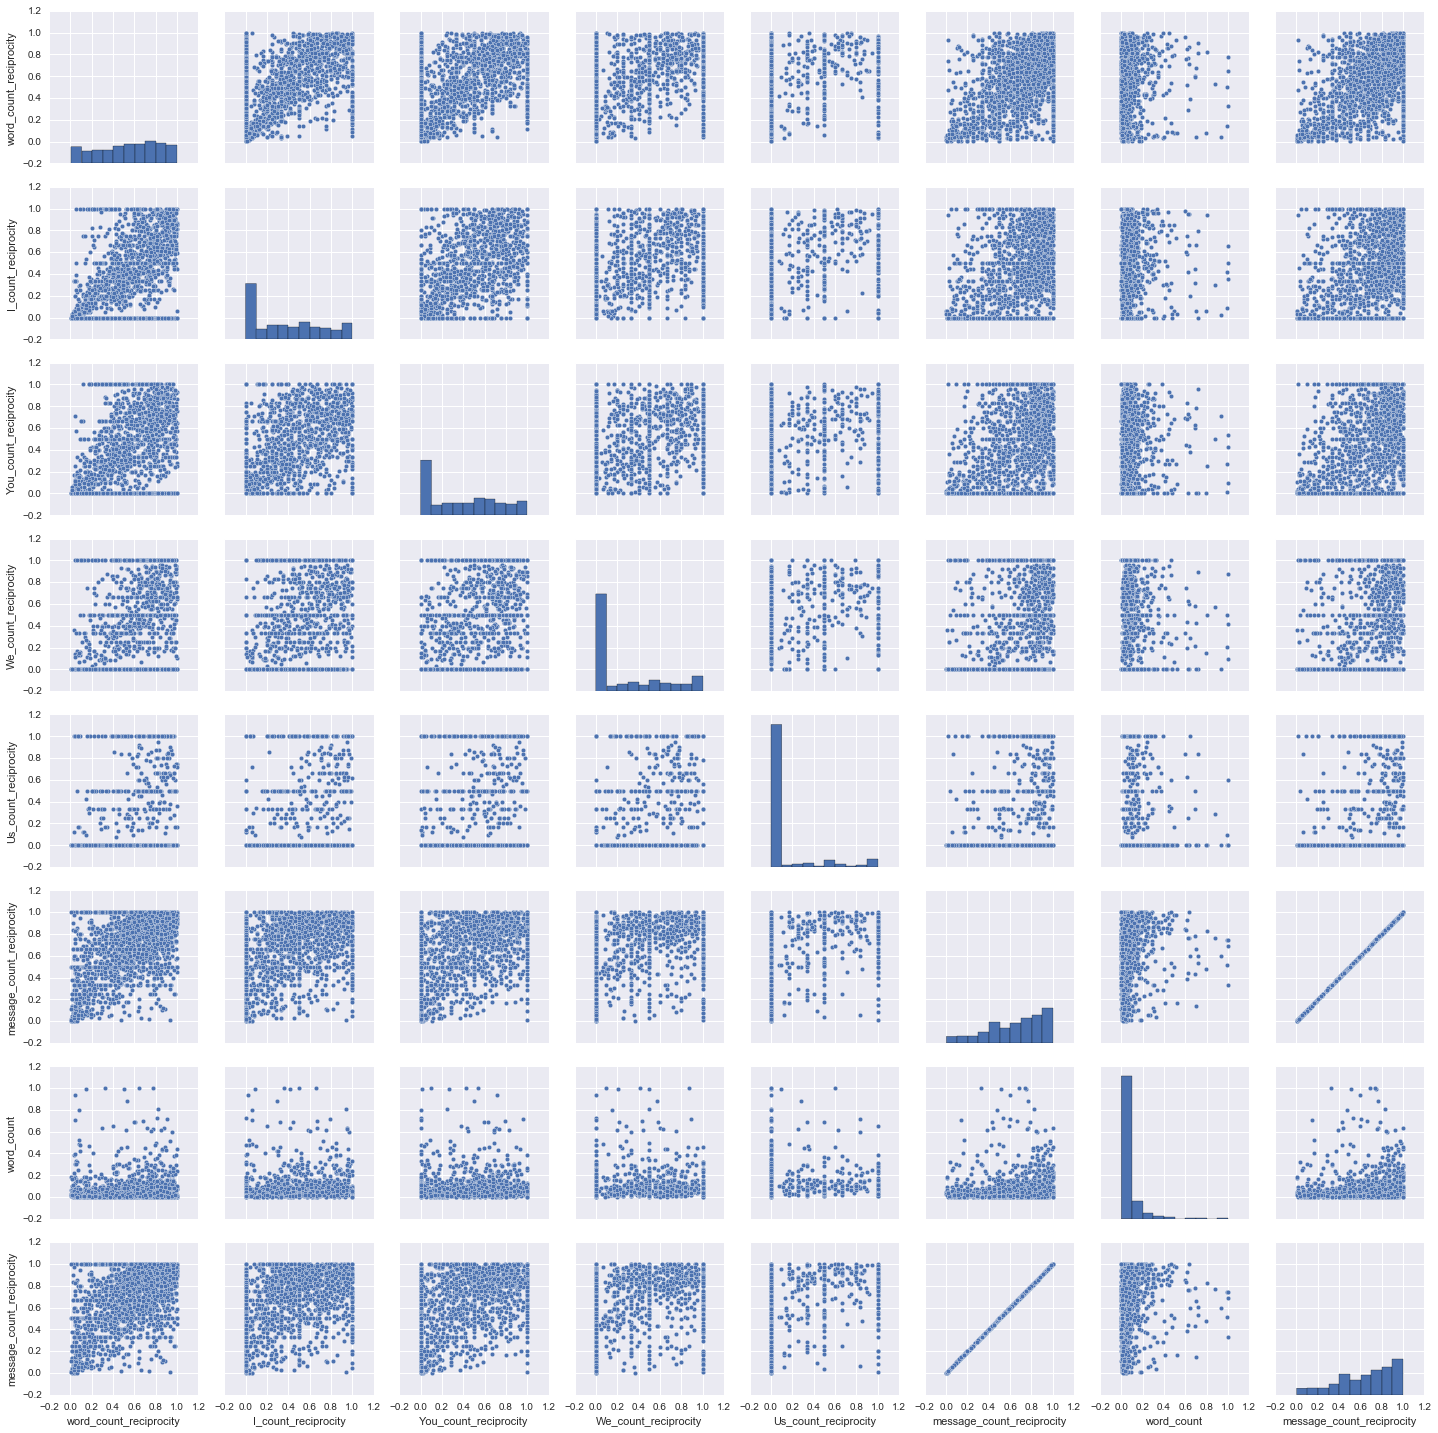

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df, vars=["word_count_reciprocity", "I_count_reciprocity", "You_count_reciprocity", "We_count_reciprocity",
                            "Us_count_reciprocity","message_count_reciprocity","word_count","message_count_reciprocity"])
plt.show()